In [1]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
# Import CSV file using pd
path = "./pocket_cards.csv"
data = pd.read_csv(path, sep=",", header = 0, on_bad_lines='skip')

In [13]:
print(data.head())

   first_card  second_card suitness
0          11           13        o
1          12           13        o
2           4           13        o
3           6            8        o
4           3            5        o


In [14]:
# Make dict to show preflop pocket cards quality

cards_quality = {1: [14, 14, 'p'],
                 2: [13, 13, 'p']

                }
                     

In [15]:
# Create dictionary to hold values computed in the following code
cards_analysis_template =    {'total_hands': 0,
                              'suited_freq': 0,
                              'paired_freq': 0,
                              'off_freq'   : 0

                 }

In [16]:
# Create dictionary to hold frequency of each card
# Ace = 1
# Jack = 11, Queen = 12, King = 13

cards_frequency_template = {2: 0,
                            3: 0,
                            4: 0,
                            5: 0,
                            6: 0,
                            7: 0,
                            8: 0,
                            9: 0,
                            10: 0,
                            11: 0,
                            12: 0,
                            13: 0,
                            14: 0
}

In [17]:
# Check how many hands have been suited, as in, both cards are of the same suit (spade, diamond, club, heart)
# Also check if they are paired
# Iterate through each entry of the csv file
cards_analysis = cards_analysis_template
cards_frequency = cards_frequency_template
for index, row in data.iterrows():
    # Create suitness variable
    suitness= str(row['suitness'])
    # If the suitness is s, update suited freq
    # If it's p, update paired freq
    # If it's o, update off freq
    if suitness == 's':
        cards_analysis['suited_freq'] += 1
    elif suitness == 'p':
        cards_analysis['paired_freq'] += 1
    elif suitness == 'o':
        cards_analysis['off_freq'] += 1
    # Update frequency of cards
    cards_frequency[row['first_card']] += 1
    cards_frequency[row['second_card']] += 1
    # Check if first card is larger in value than the second card, it shouldn't be
    if row['first_card'] > row['second_card']:
        print(f"ENTRY INDEX {index} HAS AN ERROR ERROR ERROR")
    # Update total hands count
    cards_analysis['total_hands'] += 1

In [18]:
# Print analyzed data as a DataFrame
print(f"Data found on suitness: \n{cards_analysis}\n")
for keys,values in cards_frequency.items():
    print(f"Frequency for {keys}: {values}")


Data found on suitness: 
{'total_hands': 48, 'suited_freq': 10, 'paired_freq': 4, 'off_freq': 34}

Frequency for 2: 5
Frequency for 3: 5
Frequency for 4: 9
Frequency for 5: 7
Frequency for 6: 12
Frequency for 7: 7
Frequency for 8: 6
Frequency for 9: 8
Frequency for 10: 7
Frequency for 11: 6
Frequency for 12: 7
Frequency for 13: 13
Frequency for 14: 4


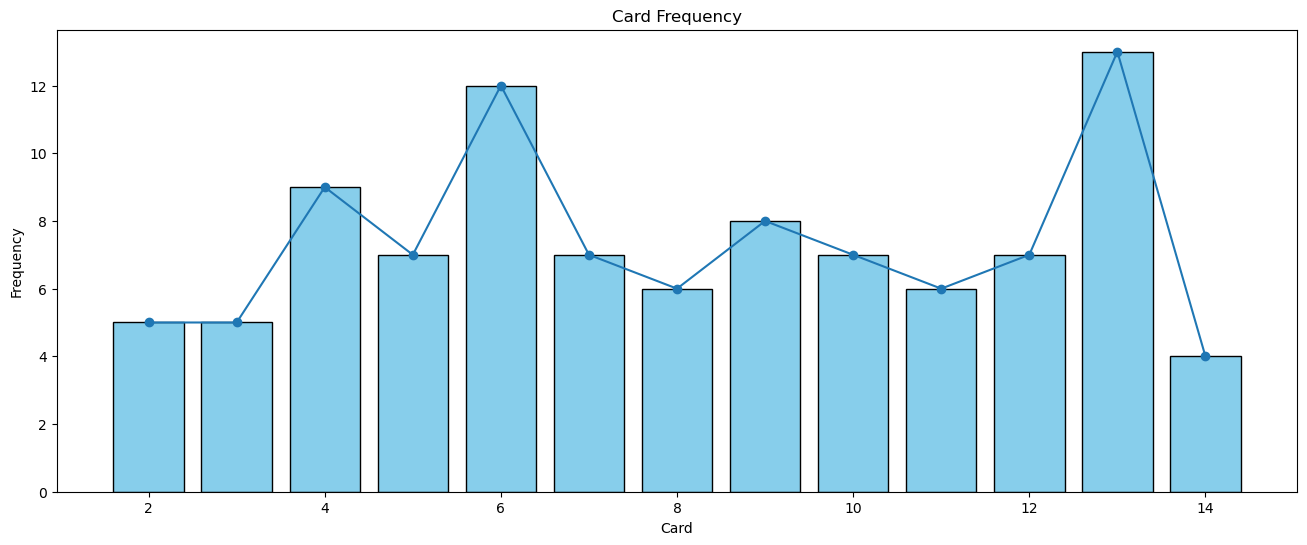

In [40]:
# Plot frequency as histogram
# https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
# Plotting a basic histogram
plt.figure(figsize = (16, 6))
plt.bar(list(cards_frequency.keys()), list(cards_frequency.values()), color='skyblue', edgecolor='black')
plt.plot(list(cards_frequency.keys()), list(cards_frequency.values()), marker='o')
#sns.histplot(list(cards_frequency.keys()), list(cards_frequency.values()), bins=13, kde=True, color='lightgreen', edgecolor='red')

# Adding labels and title
plt.xlabel('Card')
plt.ylabel('Frequency')
plt.title('Card Frequency')

#plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

# Display the plot
plt.show()

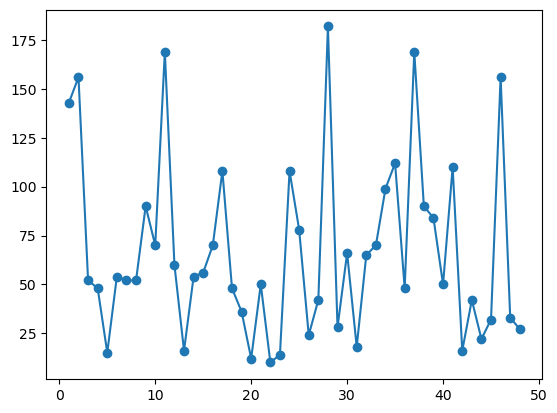

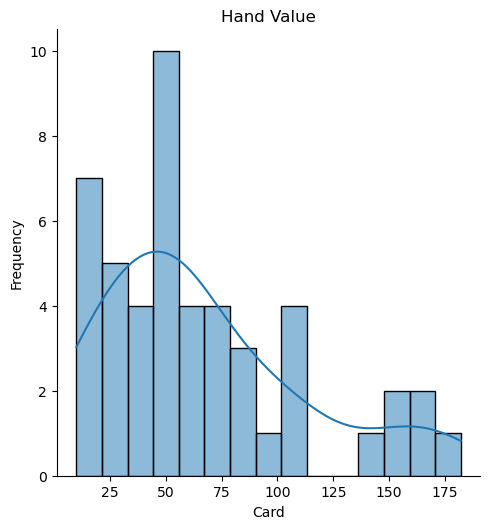

In [39]:
# Make redundant distribution graph by multiplying the first card by the second card
# https://www.statology.org/matplotlib-distribution-plot/
hist_values = []
for index, row in data.iterrows():
    hist_values.append(row['first_card'] * row['second_card'])
plt.plot(list(range(1, len(hist_values) + 1)), hist_values, marker='o')
sns.displot(hist_values, kde=True, bins=15)
plt.xlabel('Card')
plt.ylabel('Frequency')
plt.title('Hand Value')
plt.show()